# **Molecular Simulation Using Robosample**

In this lab we will simulate SARS-COV Mpro protease with Robosample using its Python interface. Then, we will run a short rigid body dynamics HMC simulation.

# Markov Chain Monte Carlo Preamble

## Monte Carlo methods
Monte carlo methods are methods that use random numbers to solve probabilistic and deterministic problems.

Let's try to estimate the value of pi by generating points in a square from a uniform distribution, using different lengths of simulation.

Please change the value of *simLen* by gradually increasing it.

<img src='https://github.com/spirilaurentiu/Notebooks/blob/main/pi.png?raw=true' />

Figure 1. Having an inscribed circle inside a square of length 2, we can randomly sample points from a 2-dim uniform distribution inside the black square and count the ones that are inside the circle. The orange area within the black square will cover $\frac{\pi}{4}$ of the black square area.


In [ ]:
# Estimation of pi
import numpy as np

# Set the length of the simulation here:
simLen = 10

# Run the simulation
inCircle = 0.0
allPoints = 0.0
for i in range(simLen):
  x = np.random.uniform()
  y = np.random.uniform()
  d = np.sqrt(x**2 + y**2)
  if d < 1:
    inCircle += 1.0
  allPoints += 1.0
myPi = (inCircle / allPoints) * 4

# Print the result
print("My pi estimation: ", myPi)

My pi estimation:  4.0


## Markov Chains

A stochastic process is a set of indexed random variables ($X_i$) which take values from a state space $S$. The transition probability from a given state A to a state B is defined as $P(A \rightarrow B) = P(X_i = A | X_{i-1} = B)$.

**Markov chains are memoryless stochastic processes.** A realization of a Markov chain is a set of values taken by the random variables once.

Markov chains cand be represented graphically as graph diagrams of states connected by edges. Edges can be weighted by transition probabilities.

Important properties of Markov chains:
1. ireducibility
2. aperiodicity
3. reversibility (garantueed by the detailed balance condition)

$\pi(A) \times P(A \rightarrow B) = \pi(B) \times P(B \rightarrow A) $

Let's draw some diagrams and check if they are well behaved (have the three required properties).

First install necessary software.

In [1]:
# Install PyGraphviz
!if pip list | grep pygraphviz ; then echo "PyGraphviz" is installed; else apt install libgraphviz-dev && pip install pygraphviz; fi


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

Let's see if this Markov chain violates the properties above.
If so, please try to correct it.

Q =  [[0.  1.  0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.  0.  1.  0. ]]


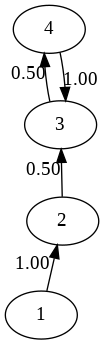

In [22]:
import pygraphviz as pgv
from IPython.display import Image
import numpy as np

# Define a graph
#myGraph={'1': {'2': None},
         #'2': {'2': None, '3': None, '4': None,'1': None },
         #'3': {'2': None},
         #'4': {'2': None, '2': None}}
myGraph={'1': {'2': None , '': None},
         #'2': {'1': None},
         '2': {'3': None , '3': None},
         #'3': {'2': None},
         '3': {'4': None},
         '4': {'3': None}}
A=pgv.AGraph(myGraph, directed=True)
#A.to_string()

# Build a transition probability matrix
Q = np.zeros((A.number_of_nodes(), A.number_of_nodes()))
for edge in (A.iteredges()):
  nodes = [int(edge[0]), int(edge[1])]
  w = 1.0 / len(np.unique(A.neighbors(nodes[0])))
  Q[nodes[0] - 1, nodes[1] - 1] = w
  edge = A.get_edge(str(nodes[0]), str(nodes[1]))
  edge.attr['weight'] = w
  edge.attr['label'] = '%.2f' % w

print("Q = ", Q)


# Draw graph
A.layout()
A.draw('file.png')
Image('file.png')



**EXERCISE**: Please correct the chain above to be well behaved.

In [13]:
# Simple simulation
pi = np.array([0.1, 0.1, 0.1, 0.7])
for i in range(30):
  pi = np.dot(pi, Q)
  print(pi)


[0.025 0.925 0.025 0.025]
[0.23125 0.30625 0.23125 0.23125]
[0.0765625 0.7703125 0.0765625 0.0765625]
[0.19257813 0.42226563 0.19257813 0.19257813]
[0.10556641 0.68330078 0.10556641 0.10556641]
[0.1708252  0.48752441 0.1708252  0.1708252 ]
[0.1218811  0.63435669 0.1218811  0.1218811 ]
[0.15858917 0.52423248 0.15858917 0.15858917]
[0.13105812 0.60682564 0.13105812 0.13105812]
[0.15170641 0.54488077 0.15170641 0.15170641]
[0.13622019 0.59133942 0.13622019 0.13622019]
[0.14783486 0.55649543 0.14783486 0.14783486]
[0.13912386 0.58262842 0.13912386 0.13912386]
[0.14565711 0.56302868 0.14565711 0.14565711]
[0.14075717 0.57772849 0.14075717 0.14075717]
[0.14443212 0.56670363 0.14443212 0.14443212]
[0.14167591 0.57497227 0.14167591 0.14167591]
[0.14374307 0.56877079 0.14374307 0.14374307]
[0.1421927 0.5734219 0.1421927 0.1421927]
[0.14335548 0.56993357 0.14335548 0.14335548]
[0.14248339 0.57254982 0.14248339 0.14248339]
[0.14313746 0.57058763 0.14313746 0.14313746]
[0.14264691 0.57205927 0.142

# Theoretical Aspects of Constrained Molecular Simulations

Molecules conformations lie in complex highly dimensional spaces, and present a challange for molecular simulations that try to explore them. Take, for example, ethane: although it is a simple molecule, it already has $8 \times 3 = 24$ dimensions. To simplify this endevour some types of degrees of freedom may be constrained: such as the bond lengths. This will increase the integration time step and reduce the number equations solved at each step.





<figure>
<center>
<img src='https://github.com/spirilaurentiu/Notebooks/blob/main/ethane.s.png?raw=true' />
<figcaption>FIGURE 1. Ethane Molecule with or without the bond lengths degrees of freedom taken into account. </figcaption>
</center>
</figure>

## Internal Coordinates
Internal coordinates, also called BAT, are the set of bond lengths, bond angles and bond torsions of a molecular system.


* As opposed to Cartesian coordinates which are absolute, BAT coordinates are relative.
* Allows the external degrees of freedom to be ignored because they are explicitly expressed in BAT
* BAT coordinates have energy terms associated with them which makes trajectories easier to calculate
* Energies associated with the three types of coordinates differ in their order of magnitude which gives them the advantage to easly constrain them by type: eg. one can fix all the bond lengths during molecular dynamics.


$ E(d, \theta, \phi) 
= \displaystyle\sum_{\textbf{B}onds}{\frac{1}{2} k_d (d - d_0)^2} 
+ \displaystyle\sum_{\textbf{A}ngles}{\frac{1}{2} k_a (\theta - \theta_0)^2}
+ \displaystyle\sum_{\textbf{T}orsions}{\frac{1}{2} k_t f(\phi, \phi_0, ...)}
$




## Rigid Body Dynamics 

In the case of biological macromolecules, their particular chemistry may induce certain patterns that can be speculated for the use of constraints. For example, proteins have secondary structures elements such as helices, that can be treated as rigid bodies during some parts of the simulation.

If we apply these type of constraints some molecule parts become rigid and **robot mechanics** algorithms can be employed to solve the equations of motion.
The mechanical part of a robot is defined as a system of articulated bodies, which is a set of bodies (links) connected by articulations (joints).

Constraints can be enforced using:
* maximal coordinates for the links (in which every link is represented with its 6 degrees of freedom) and additional equations for each constraint applyed to the whole system;
* reduced coordinates for articulations degrees of freedom

Robosample uses the complement of the set of constraints: which is the set of the remaining degrees of freedom. These remaining degrees of freedom set is called a "World".




<figure>
<center>
<img src='https://github.com/spirilaurentiu/Notebooks/blob/main/protein.s.png?raw=true' />
<figcaption>FIGURE 2. Proteins secondary structures </figcaption>
</center>
</figure>

Using constraints, by definition, do not take into account all the degrees of freedom therefore suffers from a lack of ergodicity. Also, particular degrees of freedom may be coupled when transitioning from a conformational basin to another. We overcome this in Robosample through the means of "overlaped blocked Gibbs sampling" in a method called GCHMC.

Gibbs sampling is a Markov Chain Monte Carlo algorithm which samples from a multivariate distribution $\pi(X = \{x_i\})$ by taking turns in sampling each of its component $x_i$, conditioned on the previous sampled components $\pi(x_i | \{x_{0,i-1}\})$.

In a similar fashion, the algorithm allows sampling jointly multiple components $x_{i, i+k}$ in what is called "blocked Gibbs sampling". Even more so, the components may overlap to form "overlapped blocked Gibbs sampling".

We will use this particular type of Gibbs sampling in Robosample by alternating multiple definitions of rigid bodies.
 Robosample is a molecular simulation program that uses algorithms designed primarly for robot mechanics. 




**DISSCUTION**

* Why shoud we consider using constraints?
* What macromolecule regions would you pick to constraint during different simulations?


### Further Reading
A comprehensive desciption internal coordinates molecular dynamics and usage of constraints is given in [J Phys Chem B. 2015, **119(4)**, 1233-42](https://pubs.acs.org/doi/10.1021/jp509136y).

The way they are implemented in Robosample GCHMC is found in:  [ J Chem Theory Comput. 2017, **13(10)**, 4649-4659](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5634954/) and [Biochim Biophys Acta Gen Subj. 2020, **1864(8)** 129616](https://pubmed.ncbi.nlm.nih.gov/32298789/).


# Part 0 - Download and Install Robosample
Make sure to enable GPU acceleration 
---



Robosample binaries are already build on Google colab and uploaded on Github. Clone the Github repository that contains Robosample binaries.

In [1]:
%cd /content/
! if [ -d Notebooks ]; then echo "Notebooks exists"; else git clone --recursive https://github.com/spirilaurentiu/Notebooks.git; fi
!ls Notebooks
%cd Notebooks/
!git pull

/content
Cloning into 'Notebooks'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 256 (delta 90), reused 210 (delta 48), pack-reused 0
Receiving objects: 100% (256/256), 23.46 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (90/90), done.
ala10	      mproc.png      robosample.ipynb		       test.ipynb
build	      mprocsim.png   robosample.ipynb:Zone.Identifier  tools
ethane.s.png  pi.png	     robots
inp.test      protein.s.png  simulate.py
mproc	      README.md      temp
/content/Notebooks
Already up to date.


 Now we have to make sure that Robosample binary finds its libraries. Set the linker path.
 Robosample relies heavly on GPUs. Set cuda directories.

In [2]:
%env LD_LIBRARY_PATH=/usr/lib64-nvidia:/usr/local/openmm/lib:/usr/local/openmm/lib/plugins:/content/Notebooks/build/release/robosample/src
!echo "$LD_LIBRARY_PATH"

%env CUDA_INC_DIR=/usr/local/cuda
%env CUDA_ROOT=/usr/local/cuda


%cd /content/Notebooks/build/release/robosample/src/
%mkdir -p /usr/local/openmm/lib/plugins
%cp libOpenMMOpenCL.so libOpenMMRPMDCUDA.so libOpenMMRPMDOpenCL.so libOpenMMCUDA.so libOpenMMCudaCompiler.so libOpenMMCPU.so /usr/local/openmm/lib/plugins/
%cp libOpenMM.so libOpenMM.so.7.5 libOpenMMRPMD.so /usr/local/openmm/lib/

!nvidia-smi

env: LD_LIBRARY_PATH=/usr/lib64-nvidia:/usr/local/openmm/lib:/usr/local/openmm/lib/plugins:/content/Notebooks/build/release/robosample/src
/usr/lib64-nvidia:/usr/local/openmm/lib:/usr/local/openmm/lib/plugins:/content/Notebooks/build/release/robosample/src
env: CUDA_INC_DIR=/usr/local/cuda
env: CUDA_ROOT=/usr/local/cuda
/content/Notebooks/build/release/robosample/src
Thu Mar 17 16:36:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 0000

If everything went okay so far, Robosample should run on a test small molecule.

In [3]:
%cd build/release/robosample/src/
!./GMOLMODEL_robo inp.2but

[Errno 2] No such file or directory: 'build/release/robosample/src/'
/content/Notebooks/build/release/robosample/src
Reading input...
Dumping input file:
  BOOST_MDSTEPS : 1 
  BOOST_TEMPERATURE : 600 
  DIHEDRAL : 0 1 2 3 
  DISTANCE : 0 1 
  FFSCALE : AMBER 
  FIXMAN_POTENTIAL : TRUE 
  FIXMAN_TORQUE : TRUE 
  FLEXFILE : ligand.td.flex 
  GBSA : 1.0 
  GEOMETRY : FALSE 
  INPCRD : ligand.inpcrd 
  MDSTEPS : 10 
  MOLECULES : 2but 
  NMA_OPTION : 0 
  NONBONDED_CUTOFF : 2 
  NONBONDED_METHOD : 0 
  OPENMM : TRUE 
  OPENMM_CalcOnlyNonbonded : TRUE 
  OUTPUT_DIR : temp 
  PRINT_FREQ : 1 
  PRMTOP : ligand.prmtop 
  RANDOM_WORLD_ORDER : FALSE 
  RBFILE : ligand.rb 
  REPRODUCIBLE : FALSE 
  ROOTS : 0 
  ROOT_MOBILITY : Free 
  ROUNDS : 10 
  ROUNDS_TILL_REBLOCK : 10 
  RUN_TYPE : Normal 
  SAMPLER : VV 
  SAMPLES_PER_ROUND : 1 
  SEED : 42 
  TEMPERATURE_FIN : 300 
  TEMPERATURE_INI : 300 
  THERMOSTAT : Andersen 
  THREADS : 0 
  TIMESTEPS : 0.003 
  VISUAL : FALSE 
  WORLDS : R1 
  WRI

Now let's install Robosample Python interface. Its Python interface relies on analysis with MDTraj.

In [4]:
# MDTraj is a prerequisite for robosample.py
!if pip list | grep mdtraj ; then echo "MDTraj is installed"; else pip install mdtraj; fi
!if pip list | grep pytraj ; then echo "PyTraj is installed"; else pip install pytraj; fi
!if pip list | grep nglview ; then echo "NglView is installed"; else pip install -q nglview; fi
!if pip list | grep py3Dmol ; then echo "Py3DMol is installed"; else pip install py3Dmol; fi

# Robosample Python interface is in the tools directory
%env PYTHONPATH=/env/python:/content/Notebooks/tools
!echo $PYTHONPATH


     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp37-cp37m-linux_x86_64.whl size=5533629 sha256=1dc1ef3ad0aa6840c37d849a326bdf8f90f86de907943936b13171b0c560105a
  Stored in directory: /root/.cache/pip/wheels/6f/84/9d/6854e5264a4423209de26a6e4b34d13750289c72ba0439bbfd
Successfully built mdtraj
     |████████████████████████████████| 16.1 MB 5.4 MB/s 
     |████████████████████████████████| 5.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
env: PYTHONPATH=/env/python:/content/Notebooks/tools
/env/python:/content/Notebooks/tools


A bit more setup.

In [5]:

%cd /content/Notebooks/
!cp -i build/release/robosample/src/libOpenMMPlugin.so .
!ls

/content/Notebooks
ala10		    mproc	   README.md			     temp
build		    mproc.png	   robosample.ipynb		     test.ipynb
ethane.s.png	    mprocsim.png   robosample.ipynb:Zone.Identifier  tools
inp.test	    pi.png	   robots
libOpenMMPlugin.so  protein.s.png  simulate.py


If everything went OK we should be able to set up a simple example with the Python interface.

In [6]:
# Run a test script
! if [ -d temp ]; then echo "temp directory exists"; else mkdir -p temp/pdbs; fi
!ls
!python simulate.py

temp directory exists
ala10		    mproc	   README.md			     temp
build		    mproc.png	   robosample.ipynb		     test.ipynb
ethane.s.png	    mprocsim.png   robosample.ipynb:Zone.Identifier  tools
inp.test	    pi.png	   robots
libOpenMMPlugin.so  protein.s.png  simulate.py
GPU
Starting Simulation init
Robosample directory set to /content/Notebooks
Robosample executable set to /content/Notebooks/build/release/robosample/src/GMOLMODEL_robo
DEBUG ['bot.prmtop']
Done Simulation init
robots/bot0/bot.rst7 ['robots/bot0/bot.prmtop']
Calculating distance matrix...
Calculating dssp...
coils [[ 1 11]]
flatClusts [3 2 3 2 5 4 5 4 1 1 1 1 4 5 4 5 2 3 2 3]
8 [48, 54, 'CA', 5, 'C', 5, array([ 1.4058620e-01, -1.5154932e+00, -9.9000000e-06])] [48, 54, 'CA', 5, 'C', 5, array([ 1.4058620e-01, -1.5154932e+00, -9.9000000e-06])]
9 [46, 48, 'N', 5, 'CA', 5, array([-1.2978867e+00, -6.4427650e-01,  4.6000000e-06])] [46, 48, 'N', 5, 'CA', 5, array([-1.2978867e+00, -6.4427650e-01,  4.6000000e-06])]
10 [58, 64, 'CA

Robosample, by default, writes pdb files as output.

In [7]:
!ls temp/pdbs

# Part 1 - Prepare a Robosample Script

---

<h1>Why use a script?<!h1>

Molecular dynamics simulations require a lot of information about
* Input data
  * coordinates
  * topology
  * which atoms are included in energy terms
  * parameters for functions in energy terms
* System description
  * periodicity
  * constraints
* Integrators
  * algorithms to propagate forward in time
  * adjust box size
  * adjust kinetic energy (temperature)
* Simulation
  * how long to run
  * how much output data to store

  Let's go through what the parameters mean and I'll give you values for a simple simulation of SARS-CoV MPro C-terminal part (PDB code: 2liz).



<img src='https://github.com/spirilaurentiu/Notebooks/blob/main/mproc.png?raw=true' />

In [8]:
# Check molecule
!ls mproc/

2liz.pdb  ligand.min.rst7  ligand.prmtop


<h1>Import necessary modules</h1>
First we need to import the module that contains the Robosample interface, robosample.py. Also import here oher modules that we may need.

In [9]:
# Imports
import os
import sys
if not "/content/Notebooks/tools/" in sys.path:
  sys.path.append("/content/Notebooks/tools/")


# Import Robosample module
from robosample import *


<h1>Load molecular structure files</h1>

* For input files enter “mproc/ligand.prmtop” and “mproc/ligand.min.rst7”
“Platform” describes the version of the code and the hardware it will run on
  * “CUDA” and “OpenCL” are meant for GPUs, which make MD simulations much faster. “CUDA” only works with Nvidia GPUs and “OpenCL” on others
  * “CPU” is a faster version of Reference.

* The properties dictionary indicates the number of threads to be used
* Robosample only supports Amber force field for now.



In [12]:
# Load Amber files
prmtop = AmberPrmtopFile("mproc/ligand.prmtop")
inpcrd = AmberInpcrdFile("mproc/ligand.min.rst7")

# Hardware platform
platform = Platform.getPlatformByName('GPU')
properties={'nofThreads': 0}


GPU


<h1>Create System </h1>

* “Nonbonded method” describes how long-range interactions are treated. The more interactions that need to be computed, the slower an MD simulation will be. 
  * Cutoffs don’t perform calculations if two particles are beyond a certain distance apart.
  * Ewald methods calculate long-range interaction energies between a system and its periodic images. It assumes the system repeats indefinitely.
  * Since we are using implicit solvent, we don’t need periodicity. 
Let’s use “CutoffNonPeriodic”.
* “Constraints”
  * force a degree of freedom to be a certain value

Let’s keep the other “System” parameters as is

In [13]:
# Remove any existing robots directory
if os.path.exists("robots"):
  shutil.rmtree("robots")

# Create a Robosample system by calling createSystem on prmtop
system = prmtop.createSystem(createDirs = True,
	nonbondedMethod = "CutoffPeriodic",
 	nonbondedCutoff = 1.44*nanometer,
 	constraints = None,
 	rigidWater = True,
 	implicitSolvent = True,
 	soluteDielectric = 1.0,
 	solventDielectric = 78.5,
 	removeCMMotion = False
)


<h1> Choose an Integrator </h1>

* “Integrator” is the algorithm that goes from one configuration to the next
  * Verlet is completely deterministic
  * Langevin adds some random noise to the motion. The level of noise maintains the system at a certain temperature.
  * Brownian is so random that there is no momentum
  * Variable methods use different time steps and depend on an error tolerance
  * Robosample Hybrid Monte Carlo uses Velocity Verlet

<h1> Thermostats </h1>

* allow the kinetic energy of the system to change by modifying velocities
  * Andersen - velocity reinitialization
  * Berendsen - temperature decays to target temperature
  * Nose Hoover - an extra degree of freedom in the Hamiltonian

Robosample uses Andersen

  <h1> Barostats</h1>

* keep the system at a certain pressure 
  * allows the volume of the system to change
    * Hoover
    * Rahman
    * Parrinello

since we are using implicit water, we will not use a barostat.

In [14]:
# Choose an integrator
integrator = VVIntegrator(300*kelvin,   # Temperature of head bath
                           0.001*picoseconds) # Time step

<h1>Wrap everything in a Simulation Object</h1>

* “Reporters” store data about the simulation

  * “PDB” structure files are saved in the specified output directory
  * “DCD” is a binary file format for molecular dynamics trajectories

* “Report Interval” is how often the data are stored


In [15]:
# Create Simulation object
simulation = Simulation(prmtop.topology, system, integrator, platform, properties)
simulation.reporters.append(PDBReporter('temp', 3))
simulation.context.setPositions(inpcrd.positions)

Starting Simulation init
Robosample directory set to /content/Notebooks
Robosample executable set to /content/Notebooks/build/release/robosample/src/GMOLMODEL_robo
DEBUG ['bot.prmtop']
Done Simulation init
robots/bot0/bot.rst7 ['robots/bot0/bot.prmtop']
Calculating distance matrix...
Calculating dssp...
coils [[  0  13]
 [ 28  40]
 [ 50  57]
 [ 71  74]
 [ 88 108]
 [111 120]]
flatClusts [1 7 4 4 7 1 1 4 7 5 2 1 3 5 1 3 7 6 2 4 2 3 4 1 7 6 6 7 7 5 7 4 4 1 4 6 4
 7 1 4 1 7 2 1 6 7 2 2 7 5 1 2 7 7 7 2 7 7 4 2 1 7 7 4 2 1 3 2 2 2 7 4 3 5
 1 7 6 2 6 7 7 4 7 4 1 7 1 2 3 4 4 6 1 2 7 6 1 3 3 2 2 6 4 3 4 6 7 4 1 4 7
 1 7 3 2 5 4 1 2 7 6 7 2 3 2 5 2 6 2 2 1 6 3 1 2 1 4 2 2 1 4 4 5 7 1 4 6 3
 4 1 2 7 6 1 6 5 7 3 2 3 3 7 5 2 2 2 2 3 2 4 1 3 4 4 3 2 2 2 3 1 3 1 4 2 2
 7 7 7 2 7 6 2 2 3 6 1 2 4 4 4 3 6 1 2 2 5 7 1 4 1 6 3 3 1 7 1 3 7 1 4 1 4
 4 2 1 4 7 6 7 2 1 6 4 4 4 5 7 7 7 7]
0 [4, 12, 'CA', 0, 'C', 0, array([ 1.0200005,  0.1549997, -1.150999 ])] [4, 12, 'CA', 0, 'C', 0, array([ 1.0200005,  0.1549



<h1> Add Worlds </h1>

The concept of "World" is esential to Robosample.

When simulating the molecular system with constraints, Robosample uses the complement of the set of constraints: which is the set of the remaining degrees of freedom. These remaining degrees of freedom set is called a "World", and corresponds to a Gibbs block.




<h3>Types of Worlds:</h3>

There are different types of world that can be defined by the Robosample Python interface set up by the following keywords:
* *accesibile* : residues chosen based on the solvent accesible surface are (SASA) will give mostly the exposed rotamers - known to give most of, for example, receptor flexibility in ligand binding

* *loops*: regions between secondary structures <br />

* *stretch*: only a particular stretch of amino acids <br />

* *roll*: builds a World for every backbone torsion angle within a stretch <br />


In [16]:
## Generate NMA-Scaled Flex Files
sAll = [[1, 120]]
nterJoint = [[11, 12]]

simulation.addWorld(regionType='stretch',
                    region=sAll,
                    rootMobility='Weld',
                    timestep=0.003,
                    mdsteps=40,
                    argJointType='Pin',
                    subsets=['rama','side'],
                    samples=1)

simulation.addWorld(regionType='stretch',
                    region=nterJoint,
                    rootMobility='Weld',
                    timestep=0.02,
                    mdsteps=5,
                    argJointType='Pin',
                    subsets=['rama','side'],
                    samples=1)


Starting Simulation addWorld
region [[  1 120]]
flatRegion [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]
Wrote to bot.stretch.2.flex
Done Simulation addWorld
Starting Simulation addWorld
region [[11 12]]
flatRegion [11 12]
Wrote to bot.stretch.3.flex
Done Simulation addWorld


<h1>Run the simulation </h1>

The Simulation step function in Robosample takes the number of **rounds** of Gibbs sampling as input (not the number of steps of MD).


In [17]:

# Run simulation
simulation.step(300)



Starting Simulation step
Done Simulation step


Check the output

In [18]:
!ls temp/pdbs

final.bot01.0000000300.pdb    sb.bot01.0.s0.0000000150.pdb
sb.bot01.0.s0.0000000000.pdb  sb.bot01.0.s0.0000000153.pdb
sb.bot01.0.s0.0000000003.pdb  sb.bot01.0.s0.0000000156.pdb
sb.bot01.0.s0.0000000006.pdb  sb.bot01.0.s0.0000000159.pdb
sb.bot01.0.s0.0000000009.pdb  sb.bot01.0.s0.0000000162.pdb
sb.bot01.0.s0.0000000012.pdb  sb.bot01.0.s0.0000000165.pdb
sb.bot01.0.s0.0000000015.pdb  sb.bot01.0.s0.0000000168.pdb
sb.bot01.0.s0.0000000018.pdb  sb.bot01.0.s0.0000000171.pdb
sb.bot01.0.s0.0000000021.pdb  sb.bot01.0.s0.0000000174.pdb
sb.bot01.0.s0.0000000024.pdb  sb.bot01.0.s0.0000000177.pdb
sb.bot01.0.s0.0000000027.pdb  sb.bot01.0.s0.0000000180.pdb
sb.bot01.0.s0.0000000030.pdb  sb.bot01.0.s0.0000000183.pdb
sb.bot01.0.s0.0000000033.pdb  sb.bot01.0.s0.0000000186.pdb
sb.bot01.0.s0.0000000036.pdb  sb.bot01.0.s0.0000000189.pdb
sb.bot01.0.s0.0000000039.pdb  sb.bot01.0.s0.0000000192.pdb
sb.bot01.0.s0.0000000042.pdb  sb.bot01.0.s0.0000000195.pdb
sb.bot01.0.s0.0000000045.pdb  sb.bot01.0.s0.0000000198.p

A more low-level solution for the step function in the Python interface.

**DON'T RUN THIS IF THE LAST STEP WENT OK**

In [ ]:
# Backup run
!rm temp/pdbs/*
!ls robots/bot0/
!cat inp.test
!./build/release/robosample/src/GMOLMODEL_robo inp.test

In [ ]:
!ls temp/pdbs/* | wc -l

Convert the *pdb* files into a more compact *dcd* trajectory.

In [ ]:
import pytraj as pt
traj = pt.load('temp/pdbs/*.pdb', 'mproc/ligand.prmtop')
pt.write_traj('mproc.dcd', traj, overwrite=True)
!ls -lht

<h2> Viusalize the results </h2>

Install necessary tools

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

try:
  import py3Dmol
except:
  !pip install py3Dmol
  import py3Dmol


Visualize trajectory

In [ ]:
# Visualize
import pytraj as pt
import nglview as nv

traj = pt.load('mproc.dcd', 'mproc/ligand.prmtop')
traj.superpose(ref=0, mask='@CA')
view = nv.show_pytraj(traj)
#view.add_line(traj)
#view.zoomTo()
#view.show()
view

NGLWidget(max_frame=100)

<img src='https://github.com/spirilaurentiu/Notebooks/blob/main/mprocsim.png?raw=true' />

Save the results if you want, although pay attention to the size.

In [ ]:
GitHub_dir = '/content/drive/MyDrive/GitHub'
import os
if not os.path.isdir(GitHub_dir):
  !mkdir -p {GitHub_dir}

os.chdir(GitHub_dir)
if not os.path.isdir(os.path.join(GitHub_dir,'modelingworkshop')):
  !git clone https://github.com/CCBatIIT/modelingworkshop
else:
  os.chdir(os.path.join(GitHub_dir,'modelingworkshop'))
  !git pull origin main